## titre
**latex**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm;

%matplotlib inline

folder='C:/Users/Raskolnikov/Downloads/DAN-P6-donnees/DAN-P6-donnees/'

In [2]:
df_customers = pd.read_csv(folder+'customers.csv')
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [3]:
df_products = pd.read_csv(folder+'products.csv')
df_products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [4]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


In [7]:
df_products.shape

(3287, 3)

In [8]:
df_products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [14]:
print(df_products.shape)
df_products.dtypes

(3287, 3)


id_prod     object
price      float64
categ        int64
dtype: object

In [5]:
df_transactions = pd.read_csv(folder+'transactions.csv')
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


In [6]:
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


In [11]:
df_all=pd.merge(df_transactions,df_products,how='left', on='id_prod')
df_all.head()

,id_prod,date,session_id,client_id,price,categ
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0


In [12]:
df_all=pd.merge(df_all,df_customers,how='left', on='client_id')
df_all.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980


In [20]:
df_all.drop(df_all[df_all.date.str.contains('^test')].index,inplace=True)
df_all[df_all.date.str.contains('^test')]

,id_prod,date,session_id,client_id,price,categ,sex,birth


In [21]:
df_all['date'] = pd.to_datetime(df_all['date'])
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 46.6+ MB


In [23]:
df_all['age'] = df_all['birth'].apply(lambda x:2022-x)
df_all.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,36
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,34
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,54
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,22
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,42


In [69]:
df_all[['0','1','2']]=pd.get_dummies(df_all['categ'])
df_all[['m','f']]=pd.get_dummies(df_all['sex'])
df_all.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,0,1,2,month,h,f
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,36,1,0,0,2022-05,1,0
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,34,0,1,0,2022-02,0,1
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,54,1,0,0,2022-06,1,0
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,22,0,0,1,2021-06,0,1
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,42,1,0,0,2023-01,0,1


In [66]:
df_all['month'] = df_all['date'].dt.strftime('%Y-%m')
df_all.head()

,id_prod,date,session_id,client_id,price,categ,sex,birth,age,0,1,2,month
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103,4.18,0.0,f,1986,36,1,0,0,2022-05
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534,15.99,1.0,m,1988,34,0,1,0,2022-02
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714,7.99,0.0,f,1968,54,1,0,0,2022-06
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941,69.99,2.0,m,2000,22,0,0,1,2021-06
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232,4.99,0.0,m,1980,42,1,0,0,2023-01


In [67]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 679332 entries, 0 to 679531
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   id_prod     679332 non-null  object        
 1   date        679332 non-null  datetime64[ns]
 2   session_id  679332 non-null  object        
 3   client_id   679332 non-null  object        
 4   price       679111 non-null  float64       
 5   categ       679111 non-null  float64       
 6   sex         679332 non-null  object        
 7   birth       679332 non-null  int64         
 8   age         679332 non-null  int64         
 9   0           679332 non-null  uint8         
 10  1           679332 non-null  uint8         
 11  2           679332 non-null  uint8         
 12  month       679332 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(2), object(5), uint8(3)
memory usage: 59.0+ MB


In [90]:
df_all_by_customer=df_all.groupby('client_id').agg(
    sex=('sex', np.max),
    age=('age', np.max),
    amount=('price', np.sum),
    count=('session_id', np.count_nonzero),
    categ_0=('0', np.count_nonzero),
    categ_1=('1', np.count_nonzero),
    categ_2=('2', np.count_nonzero))
df_all_by_customer.sort_values(by='amount',ascending=False,inplace=True)
df_all_by_customer['amount']=df_all_by_customer['amount'].apply(lambda x : "{:,.2f}".format(x))
sex={'f':0,'m':1}
df_all_by_customer['sex']=df_all_by_customer['sex'].apply(lambda x:sex.get(x,''))
df_all_by_customer.head()

,sex,age,amount,count,categ_0,categ_1,categ_2
client_id,,,,,,,
c_1609,1,42,"324,033.35",25488,20167,5310,11
c_4958,1,23,"289,760.34",5195,4,1888,3303
c_6714,0,54,"153,598.92",9187,5310,3568,303
c_3454,1,53,"113,637.93",6773,2697,4055,18
c_3263,0,37,"5,276.87",403,314,89,0


In [97]:
df_all_by_month=df_all.groupby('month').agg(
    age=('age', np.mean),
    m=('m', np.count_nonzero),
    f=('f', np.count_nonzero),
    amount=('price', np.sum),
    avg_price=('price', np.mean),
    count=('session_id', np.count_nonzero),
    categ_0=('0', np.count_nonzero),
    categ_1=('1', np.count_nonzero),
    categ_2=('2', np.count_nonzero))
df_all_by_month.sort_values(by='month',ascending=True,inplace=True)
df_all_by_month['amount']=df_all_by_month['amount'].apply(lambda x : "{:,.2f}".format(x))
df_all_by_month['avg_price']=df_all_by_month['avg_price'].apply(lambda x : "{:,.2f}".format(x))
df_all_by_month['age']=df_all_by_month['age'].apply(lambda x : "{:,.1f}".format(x))
df_all_by_month.head(35)

,age,m,f,amount,avg_price,count,categ_0,categ_1,categ_2
month,,,,,,,,,
2021-03,44.2,14161,14449,"482,440.61",16.87,28610,18131,9134,1336
2021-04,43.9,14283,14174,"476,109.30",16.74,28457,19342,7579,1522
2021-05,44.0,14219,14074,"492,943.47",17.43,28293,18501,8107,1677
2021-06,44.0,13303,13554,"484,088.56",18.03,26857,15898,9264,1688
2021-07,43.8,12285,12457,"482,835.40",19.52,24742,13578,9169,1991
2021-08,43.7,12771,12888,"482,284.79",18.80,25659,15728,7954,1968
2021-09,44.7,16402,16924,"507,240.68",15.23,33326,23142,9268,904
2021-10,43.1,10495,11111,"320,798.74",14.85,21606,18762,1666,1171
2021-11,44.6,14060,14261,"516,167.73",18.23,28321,14600,12316,1395


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from patsy import dmatrices
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm;

%matplotlib inline

folder='C:/Users/Raskolnikov/Downloads/DAN-P6-donnees/DAN-P6-donnees/'

df_customers = pd.read_csv(folder+'customers.csv')
df_products = pd.read_csv(folder+'products.csv')
df_transactions = pd.read_csv(folder+'transactions.csv')

df_all=pd.merge(df_transactions,df_products,how='left', on='id_prod')
df_all=pd.merge(df_all,df_customers,how='left', on='client_id')

df_all.drop(df_all[df_all.date.str.contains('^test')].index,inplace=True)

df_all['date'] = pd.to_datetime(df_all['date'])

df_all['age'] = df_all['birth'].apply(lambda x:2022-x)

df_all[['0','1','2']]=pd.get_dummies(df_all['categ'])
df_all[['m','f']]=pd.get_dummies(df_all['sex'])

df_all['month'] = df_all['date'].dt.strftime('%Y-%m')

df_all.dropna(inplace=True)

df_all_by_customer=df_all.groupby('client_id').agg(
    sex=('sex', np.max),
    age=('age', np.max),
    amount=('price', np.sum),
    count=('session_id', np.count_nonzero),
    categ_0=('0', np.count_nonzero),
    categ_1=('1', np.count_nonzero),
    categ_2=('2', np.count_nonzero))
df_all_by_customer.sort_values(by='amount',ascending=False,inplace=True)
#df_all_by_customer['amount']=df_all_by_customer['amount'].apply(lambda x : "{:,.2f}".format(x))
sex={'f':0,'m':1}
df_all_by_customer['sex']=df_all_by_customer['sex'].apply(lambda x:sex.get(x,''))

df_all_by_month=df_all.groupby('month').agg(
    age=('age', np.mean),
    m=('m', np.count_nonzero),
    f=('f', np.count_nonzero),
    amount=('price', np.sum),
    avg_price=('price', np.mean),
    count=('session_id', np.count_nonzero),
    categ_0=('0', np.count_nonzero),
    categ_1=('1', np.count_nonzero),
    categ_2=('2', np.count_nonzero))
df_all_by_month.sort_values(by='month',ascending=True,inplace=True)
df_all_by_month['amount']=df_all_by_month['amount'].apply(lambda x : "{:,.2f}".format(x))
df_all_by_month['avg_price']=df_all_by_month['avg_price'].apply(lambda x : "{:,.2f}".format(x))
df_all_by_month['age']=df_all_by_month['age'].apply(lambda x : "{:,.1f}".format(x))

In [3]:
df_all_by_customer.head()

,sex,age,amount,count,categ_0,categ_1,categ_2
client_id,,,,,,,
c_1609,1,42,324033.35,25488,20167,5310,11
c_4958,1,23,289760.34,5195,4,1888,3303
c_6714,0,54,153598.92,9181,5310,3568,303
c_3454,1,53,113637.93,6770,2697,4055,18
c_3263,0,37,5276.87,403,314,89,0


In [14]:
df_all_by_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8600 entries, 0 to 8599
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   index      8600 non-null   int64  
 1   client_id  8600 non-null   object 
 2   sex        8600 non-null   int64  
 3   age        8600 non-null   int64  
 4   amount     8600 non-null   float64
 5   count      8600 non-null   int64  
 6   categ_0    8600 non-null   int64  
 7   categ_1    8600 non-null   int64  
 8   categ_2    8600 non-null   int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 604.8+ KB


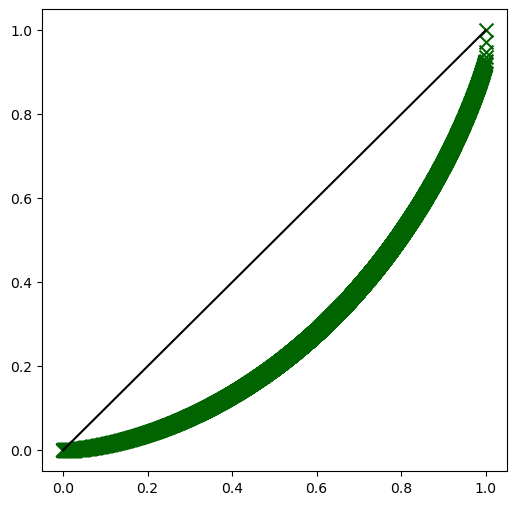

In [31]:
from matplotlib import pyplot as plt
%matplotlib inline

X=df_all_by_customer.amount.sort_values()
X_lorenz = X.cumsum() / X.sum()

fig, ax = plt.subplots(figsize=[6,6])
## scatter plot of Lorenz curve
ax.scatter(np.arange(X_lorenz.size)/(X_lorenz.size-1), X_lorenz, 
           marker='x', color='darkgreen', s=100)
## line plot of equality
ax.plot([0,1], [0,1], color='k')
plt.show()

In [18]:
df_all_by_customer.amount

0       324033.35
1       289760.34
2       153598.92
3       113637.93
4         5276.87
          ...    
8595        11.20
8596        11.06
8597         9.98
8598         8.30
8599         6.31
Name: amount, Length: 8600, dtype: float64

In [33]:
# One way anova
import scipy.stats as stats

stats.f_oneway(df_all['price'][df_all['sex'] == 'f'],
               df_all['price'][df_all['sex'] == 'm'])

F_onewayResult(statistic=35.51321137905737, pvalue=2.5345073555518197e-09)

F=35.51

p-value=2.53

In [34]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('price ~ C(sex)', data=df_all).fit()
aov_table = sm.stats.anova_lm(model, typ=2)

def anova_table(aov):
    aov['mean_sq'] = aov[:]['sum_sq']/aov[:]['df']

    aov['eta_sq'] = aov[:-1]['sum_sq']/sum(aov['sum_sq'])

    aov['omega_sq'] = (aov[:-1]['sum_sq']-(aov[:-1]['df']*aov['mean_sq'][-1]))/(sum(aov['sum_sq'])+aov['mean_sq'][-1])

    cols = ['sum_sq', 'df', 'mean_sq', 'F', 'PR(>F)', 'eta_sq', 'omega_sq']
    aov = aov[cols]
    return aov

anova_table(aov_table)

,sum_sq,df,mean_sq,F,PR(>F),eta_sq,omega_sq
C(sex),1.193013e+04,1.0,11930.133401,35.513211,2.534507e-09,0.000052,0.000051
Residual,2.281365e+08,679109.0,335.935077,NaN,NaN,NaN,NaN


In [35]:
import scipy.stats as stats

stats.shapiro(model.resid)

C:\Users\Raskolnikov\anaconda3\lib\site-packages\scipy\stats\_morestats.py:1800: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


ShapiroResult(statistic=0.5477843880653381, pvalue=0.0)

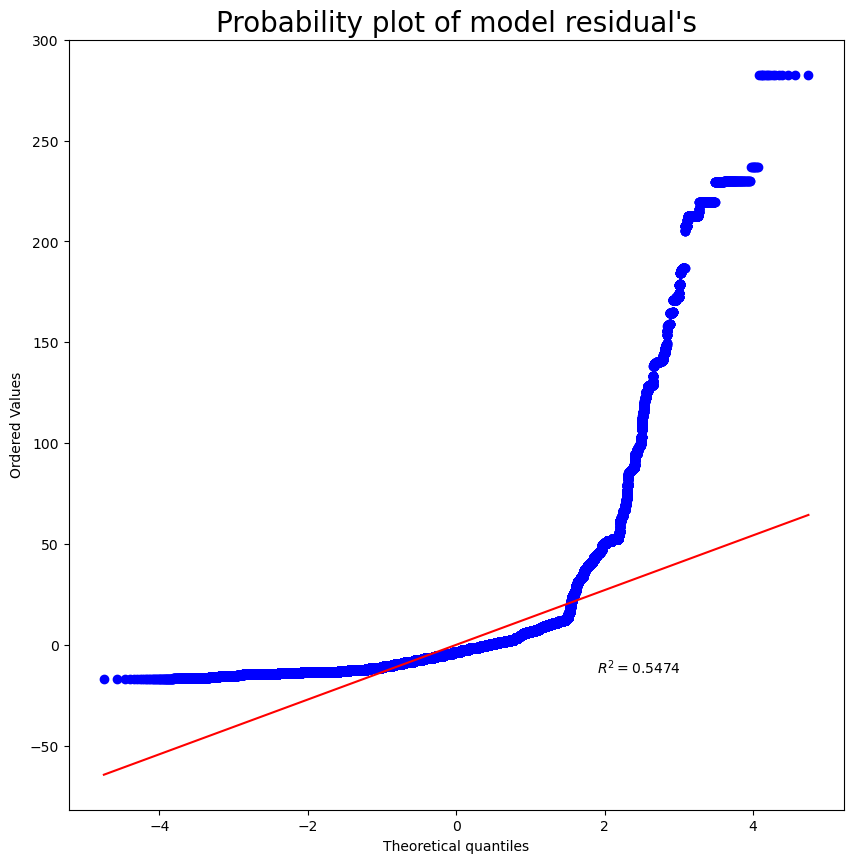

In [36]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [38]:
stats.levene(df_all['price'][df_all['sex'] == 'f'],
             df_all['price'][df_all['sex'] == 'm'])

LeveneResult(statistic=53.350196718289965, pvalue=2.793867220811495e-13)

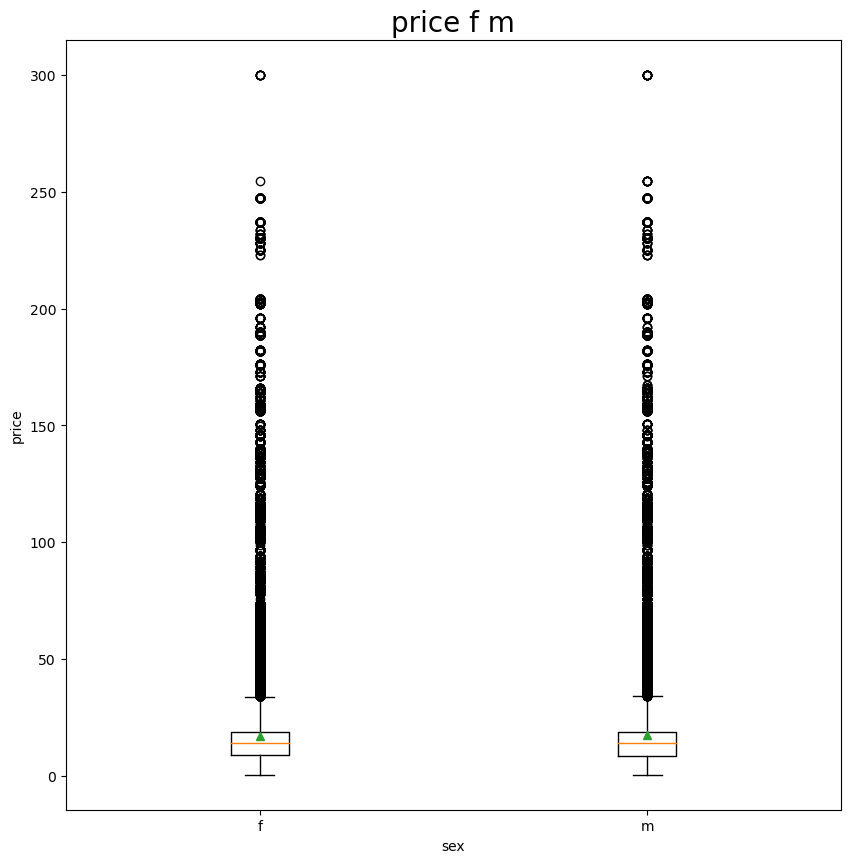

In [41]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("price f m", fontsize= 20)
ax.set

data = [df_all['price'][df_all['sex'] == 'f'],
        df_all['price'][df_all['sex'] == 'm']]

ax.boxplot(data,
           labels= ['f', 'm'],
           showmeans= True)

plt.xlabel("sex")
plt.ylabel("price")

plt.show()

In [43]:
import statsmodels.stats.multicomp as mc

comp = mc.MultiComparison(df_all['price'], df_all['sex'])
tbl, a1, a2 = comp.allpairtest(stats.ttest_ind, method= "bonf")

tbl

group1,group2,stat,pval,pval_corr,reject
f,m,-5.9593,0.0,0.0,True


In [30]:
# crosstab
crosstab = pd.crosstab(df_all['sex'], df_all['categ'])
stats.chi2_contingency(crosstab)

(147.11906816131497,
 1.1310980597090762e-32,
 2,
 array([[206952.24759281, 113159.50583189,  18173.2465753 ],
        [208506.75240719, 114009.49416811,  18309.7534247 ]]))

chi-squared=147.12
p-value= 1.13>0.05
df=2

expected_counts= [[206952.24759281, 113159.50583189,  18173.2465753 ],[208506.75240719, 114009.49416811,  18309.7534247 ]]


In [20]:
df_all_by_customer.head()

,sex,age,amount,count,categ_0,categ_1,categ_2
client_id,,,,,,,
c_1609,1,42,324033.35,25488,20167,5310,11
c_4958,1,23,289760.34,5195,4,1888,3303
c_6714,0,54,153598.92,9181,5310,3568,303
c_3454,1,53,113637.93,6770,2697,4055,18
c_3263,0,37,5276.87,403,314,89,0


In [21]:
df_all_by_customer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8600 entries, c_1609 to c_8351
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   sex      8600 non-null   int64  
 1   age      8600 non-null   int64  
 2   amount   8600 non-null   float64
 3   count    8600 non-null   int64  
 4   categ_0  8600 non-null   int64  
 5   categ_1  8600 non-null   int64  
 6   categ_2  8600 non-null   int64  
dtypes: float64(1), int64(6)
memory usage: 537.5+ KB


In [23]:
import scipy.stats as stats

stats.f_oneway(df_all_by_customer['count'][df_all_by_customer['sex'] == 0],
               df_all_by_customer['count'][df_all_by_customer['sex'] == 1])

F_onewayResult(statistic=1.133031774442631, pvalue=0.2871594705469542)

In [8]:
df_all_by_month.head()

,age,m,f,amount,avg_price,count,categ_0,categ_1,categ_2
month,,,,,,,,,
2021-03,44.2,14156,14445,"482,440.61",16.87,28601,18131,9134,1336
2021-04,43.9,14275,14168,"476,109.30",16.74,28443,19342,7579,1522
2021-05,44.0,14212,14073,"492,943.47",17.43,28285,18501,8107,1677
2021-06,44.0,13299,13551,"484,088.56",18.03,26850,15898,9264,1688
2021-07,43.8,12283,12455,"482,835.40",19.52,24738,13578,9169,1991


In [27]:
df_all_by_month[['avg_price']].describe()


,avg_price
count,24
unique,23
top,17.88
freq,2


In [103]:
df_all_by_month['amount'].plot(kind='line');

TypeError: no numeric data to plot